# Project Summary

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. This tabular dataset consists of listings of all the movies and tv shows available on Netﬂix, along with details such as - cast, directors, ratings, release year, duration, etc. It will be interesting to explore what all other insights can be obtained from the same dataset.

Initially i started with basic understanding of the dataset: datatypes of attributes, missing or null values, dropping unnecessary columns or rows, statistical observation of datapoints. Various EDA techniques were applied to analyse the data and derive important insights which will help Netflix to increase it's business.



# Github link


# Problem Statement

In this project you are required to do:

Exploratory Data Analysis.

Understanding what type content is available in different countries.

Is Netflix has increasingly been focusing on TV shows rather than movies in recent years.

Business objective:

Analyze the data and generate insights that could help Netﬂix in deciding which type of shows/movies to produce and how they can grow the business in different countries

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# load the dataset

df= pd.read_csv(r'C:\Users\hp\Downloads\Labmentix internship\NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [3]:
# first view of the data

df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [4]:
# count of rows and columns

df.shape

(7787, 12)

In [5]:
# dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [14]:
# datatype info

df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

show_id, type, title, director, cast, country, date_added, rating, duration, listed_in, description are of object data type
Only release_year is of int data type

In [6]:
# duplicate value count

df.duplicated().sum()

0

In [7]:
# missing/null values

df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
# percentage of null values

for i in df.columns:
    pct_null = df[i].isnull().sum() / len(df)*100
    if pct_null > 0 :
        print( "{}'s null percentage: {}%".format(i, round(pct_null, 2)))

director's null percentage: 30.68%
cast's null percentage: 9.22%
country's null percentage: 6.51%
date_added's null percentage: 0.13%
rating's null percentage: 0.09%


observation: "director" has the most missing value followed by "cast" and "country". There are few missing value in "date_added" and "rating".

The dataset consists of 7787 rows and 12 columns.
Null values are present in director, cast, country, date_added, and rating. Since there are only few null values present in date_added and rating (10 & 7 respectively) we can remove them from the dataset.
There are no duplicate values.
The dataset consists largely of categorical variables.

In [11]:
# Understanding variables
# dataset columns

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# statistical overview of data

df.describe(include= 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [13]:
# number of unique values in each variable

df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

observation: Only the show_id and the title have unique values and the remaining columns have repeated values as there are no duplicate values


# Data Wrangling


In [15]:
# Making copy of raw data

df1= df.copy()

In [16]:
df1.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [17]:
# Dropping columns

df1.drop(['director', 'cast'], inplace= True, axis= 1)
df1.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Director and cast columns were removed because they are not necessary for the business model ahead 

In [32]:
# removing null values from date_added column as there are only 10 null values

df1=df1[df1["date_added"].notna()]


In [82]:
# removing null values from rating column as there are only 7 null values

df1 = df1.dropna(subset=['rating'])

In [34]:
# Creating separate Year and month column from date_added column

df1['date_added'] = pd.to_datetime(df1['date_added'])  #changing the datatype

df1['year']= df1['date_added'].dt.strftime('%Y')
df1['month']= df1['date_added'].dt.strftime('%B')

In [35]:
df1.head(5)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,principal_country,first_country,year,month
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Brazil,Brazil,2020,August
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Mexico,Mexico,2016,December
2,s3,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Singapore,Singapore,2018,December
3,s4,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",United States,United States,2017,November
4,s5,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,United States,United States,2020,January


In [83]:
df1.isnull().sum()

show_id              0
type                 0
title                0
country              0
date_added           0
release_year         0
rating               0
duration             0
listed_in            0
description          0
principal_country    0
first_country        0
year                 0
month                0
dtype: int64

In [21]:
# Imputing country coulmn with mode

df1['country'] = df1['country'].fillna(df1['country'].mode()[0])

In [23]:
df1['country'].nunique()

681

In the 'country' column, we see that there are some entry where it has multiple values, so we will add a new column with just the first one so we can check which regions have more productions


In [25]:
# retrieving the first country from multiple values

df1['first_country'] = df1['country'].apply(lambda x: x.split(",")[0])
df1['first_country'].head()

0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: first_country, dtype: object

In [26]:
df1['first_country'].nunique()

81

Earlier there were 681 unique contries now it has been reduced to 81

In [97]:
df1.drop(['principal_country'], inplace= True, axis= 1)
df1.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'first_country',
       'year', 'month', 'target_ages'],
      dtype='object')

In [95]:
# Creating a new coulmn based on rating coulmn

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df1['target_ages'] = df1['rating'].replace(ratings_ages)

df1['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [98]:
# Checking the new created coulmn

df1.head(10)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,first_country,year,month,target_ages
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Brazil,2020,August,Adults
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Mexico,2016,December,Adults
2,s3,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Singapore,2018,December,Adults
3,s4,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",United States,2017,November,Teens
4,s5,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,United States,2020,January,Teens
5,s6,TV Show,46,Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,Turkey,2017,July,Adults
6,s7,Movie,122,Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",Egypt,2020,June,Adults
7,s8,Movie,187,United States,2019-11-01,1997,R,119 min,Dramas,After one of his high school students attacks ...,United States,2019,November,Adults
8,s9,Movie,706,India,2019-04-01,2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",India,2019,April,Teens
9,s10,Movie,1920,India,2017-12-15,2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,India,2017,December,Adults


# What all manipulations have you done and insights you found

1. Dropped director and cast column completely
2. Imputed the country coulmn with the mode and added a separate column for the first occurrence of the country
3. Removed 7 rows of missing values from rating column
4. Removed 10 rows of missing values from date_added column
5. Created three separate columns- year,month and target ages based on existing coulmns for further analysis

# Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

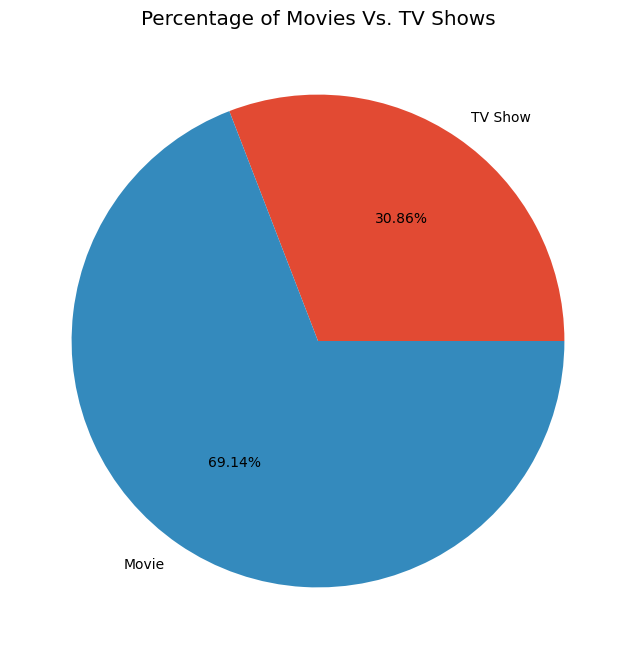

In [37]:
# Percentage of Movies Vs. T.V. Shows

label= ['TV Show', 'Movie']
plt.pie(df1['type'].value_counts().sort_values(), labels=label, 
        autopct='%1.2f%%')
plt.title('Percentage of Movies Vs. TV Shows')
plt.show()

1. Why did you pick the specific chart?
Pie charts are very useful in depicting part to whole relationship in the data. Percentage comparison can also be easily done so the above chart was chosen to express the share of movies Vs TV shows

2. What is/are the insight(s) found from the chart?
30% of the content on netflix comprises of TV shows while the rest approx 70% consists of movies

3. Will the gained insights help creating a positive business impact?



In [47]:
# Top 10 countries with maximum content 

grouping= df1.groupby(['type']).first_country.value_counts().groupby(level=0).head(10)
grouping

type     first_country 
Movie    United States     2330
         India              883
         United Kingdom     341
         Canada             175
         France             137
         Spain              119
         Egypt               93
         Mexico              79
         Turkey              78
         Japan               75
TV Show  United States     1053
         United Kingdom     235
         Japan              161
         South Korea        152
         Canada              84
         India               73
         Taiwan              70
         France              59
         Australia           51
         Spain               49
Name: first_country, dtype: int64

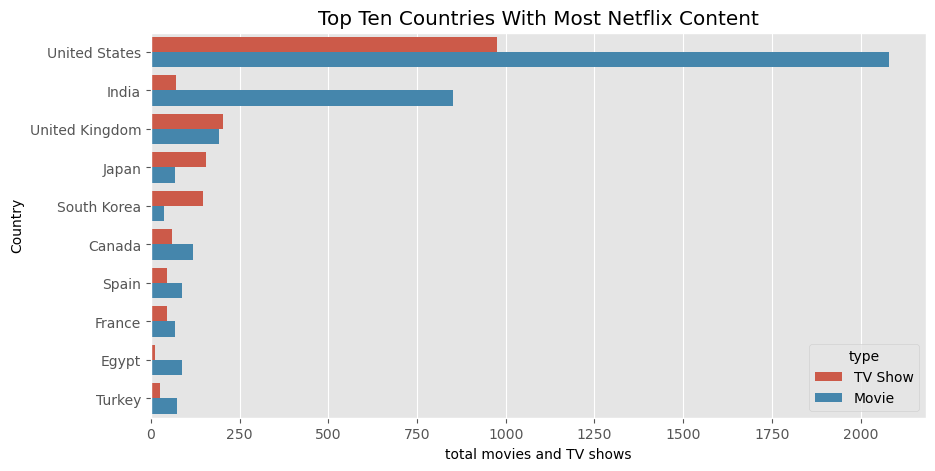

In [64]:
# Set Labels
plt.figure(figsize=(10, 5))
sns.countplot(y='country', hue='type', data=df1, order=df1.country.value_counts().iloc[:10].index)
plt.title('Top Ten Countries With Most Netflix Content')
plt.ylabel('Country')
plt.xlabel('total movies and TV shows')

# Display Chart
plt.show()

1. Why did you pick the specific chart?
Bar graphs are useful for comparing data across different categories, so to display total number of movies and tv shows in various countries bar graph is appropriate

2. What is/are the insight(s) found from the chart
U.S. tops the list with maximum number of movies(2330) as well as TV shows(1053), followed by India which has large number of movies produced as compared to TV shows because bollywood is extremely popular. South Korea on the other hand produces large number of TV shows which explains popularity of K-Drama

3. Will the gained insights help creating a positive business impact?


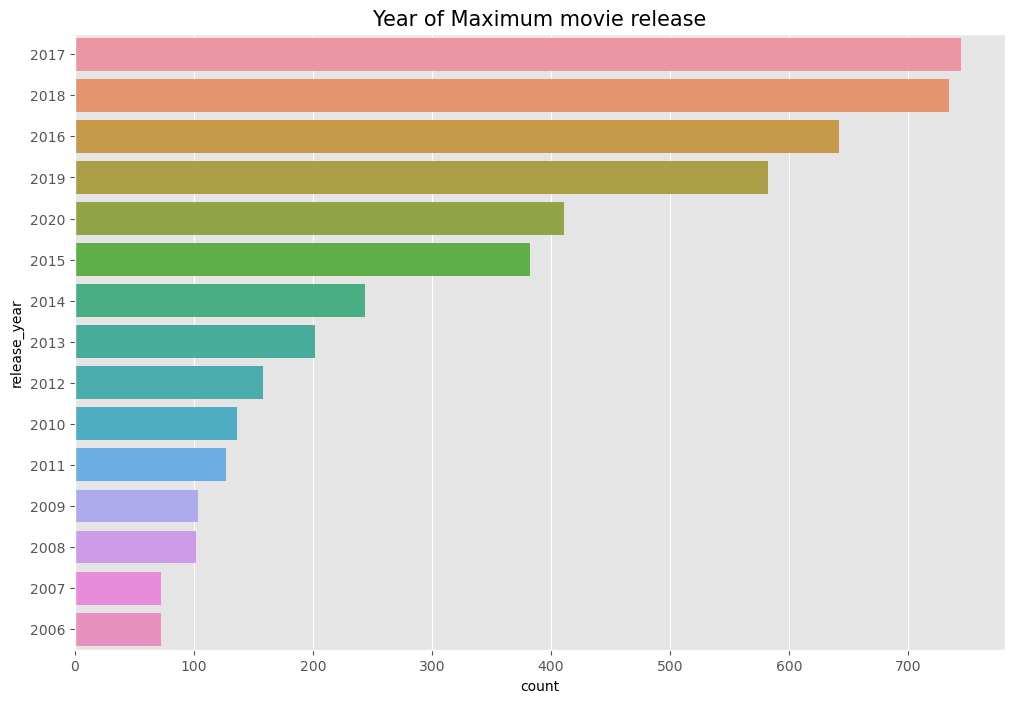

In [66]:
#Year in which maximum movies were released

df_tv = df[df["type"] == "TV Show"]
df_movie = df[df["type"] == "Movie"]

ax = sns.countplot(y="release_year", data=df_movie, order=df_movie['release_year'].value_counts().index[0:15])

plt.title('Year of Maximum movie release', fontsize=15)
plt.show()

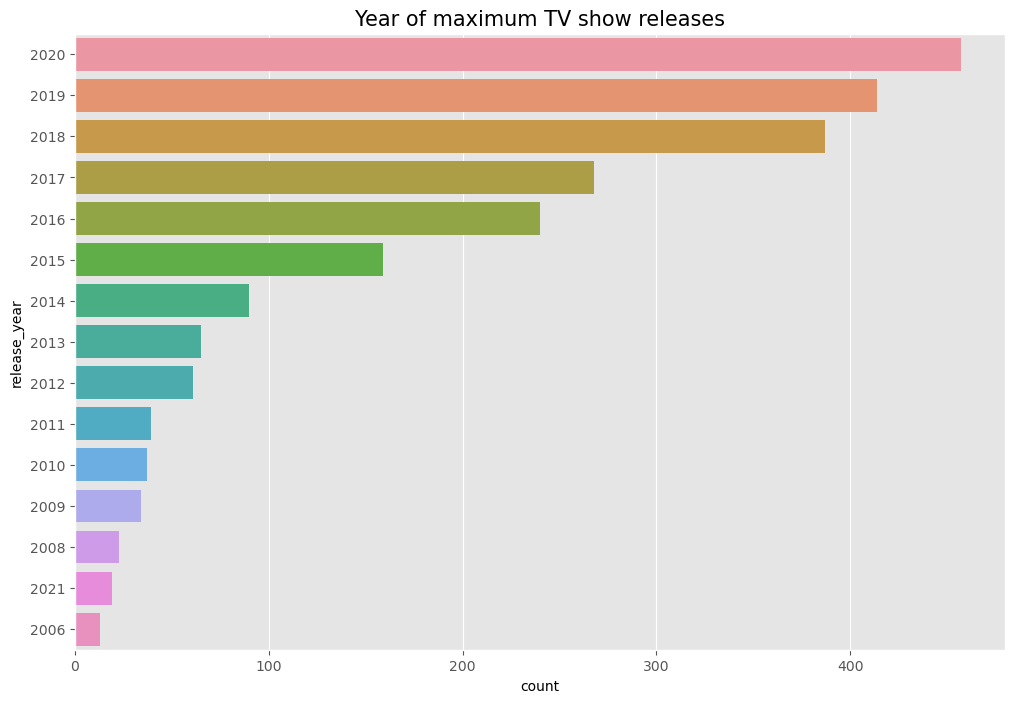

In [60]:
# Year in which maximum TV shows were released

ax = sns.countplot(y="release_year", data=df_tv, order=df_tv['release_year'].value_counts().index[0:15])

plt.title('Year of maximum TV show releases', fontsize=15)
plt.show()

1. Why did you pick the specific chart?
Bar graphs are useful for comparing data across different categories, so to show the year in which highest number of movies and tv shows were released, bar graph is used

2. What is/are the insight(s) found from the chart
Most of the movies were released in the year 2017 followed by 2018 and 2016.
Most of the TV Shows were released in 2020 followed by 2019 and 2018.
Substantial growth in content started from 2010 to 2020

3. Will the gained insights help creating a positive business impact?
The highest number of movies got released in 2017 and 2018 and tv shows got released in 2019 and 2020.
Movies released were more as compared to TV shows
very few movies were released before 2010


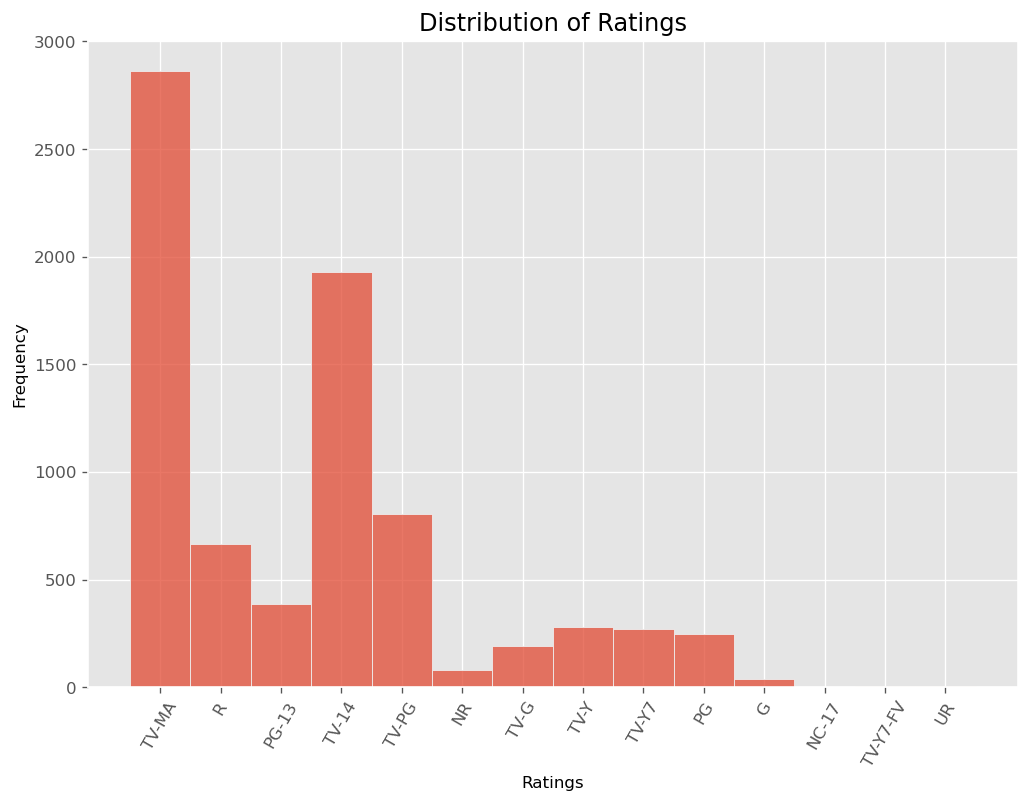

In [91]:
# Distribution of various ratings
plt.figure(figsize=(10,7), dpi=120)
sns.histplot(data= df1, x= 'rating')

# Set the labels
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.xticks(rotation = 60)

# Display the graph
plt.show()

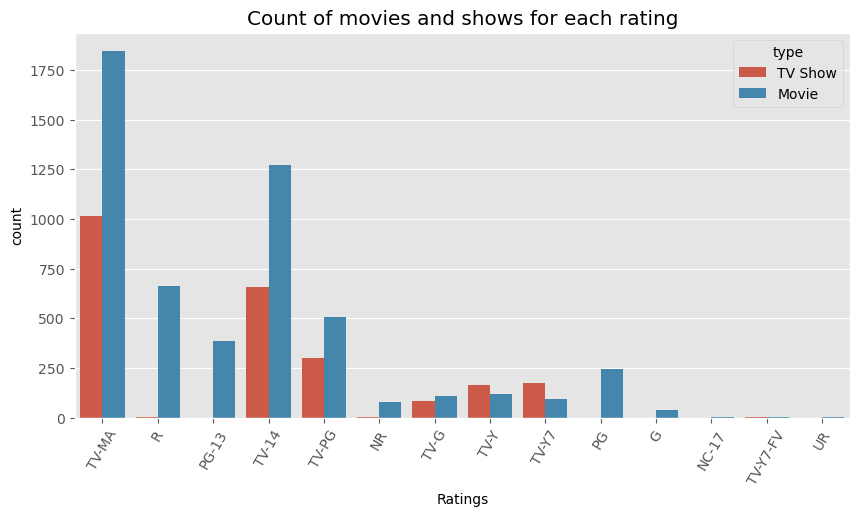

Each Rating Counts for Different Types of Shows:
rating    type   
G         Movie        39
NC-17     Movie         3
NR        Movie        79
          TV Show       4
PG        Movie       247
PG-13     Movie       386
R         Movie       663
          TV Show       2
TV-14     Movie      1272
          TV Show     656
TV-G      Movie       111
          TV Show      83
TV-MA     Movie      1845
          TV Show    1016
TV-PG     Movie       505
          TV Show     299
TV-Y      Movie       117
          TV Show     162
TV-Y7     Movie        95
          TV Show     175
TV-Y7-FV  Movie         5
          TV Show       1
UR        Movie         5
dtype: int64


In [90]:
# Count plot for number of movies and shows for each rating
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', hue='type', data=df1)

# Set Labels
plt.title('Count of movies and shows for each rating')
plt.xlabel('Ratings')
plt.xticks(rotation = 60)

# Display Chart
plt.show()

# Printing The Counts of Each Rating for Different Type Shows
print('Each Rating Counts for Different Types of Shows:')
print(df1.groupby(['rating', 'type']).size())

1. Why did you pick the specific chart?
Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories.

2. What is/are the insight(s) found from the chart
From both histogram as well as countplot we can infer that the most content on netflix is of TV-MA rating. number of movies with this rating are 1845 and 1016 TV shows are of same rating, followed by R and PG 13 rated movies and TV shows.
Interestingly, only R and PG 13 rated movies are very much high in number. The popularity of TV shows with the same rating is very low. TV 14 rated movies also contibute significantly.

3.  Will the gained insights help creating a positive business impact?
Netflix should add more movies as well as tv shows which are of TV-MA rating. TV shows with R and PG 13 rating should be removed from the platform.
Movies with R, PG 13 and TV 14 ratings should be added 

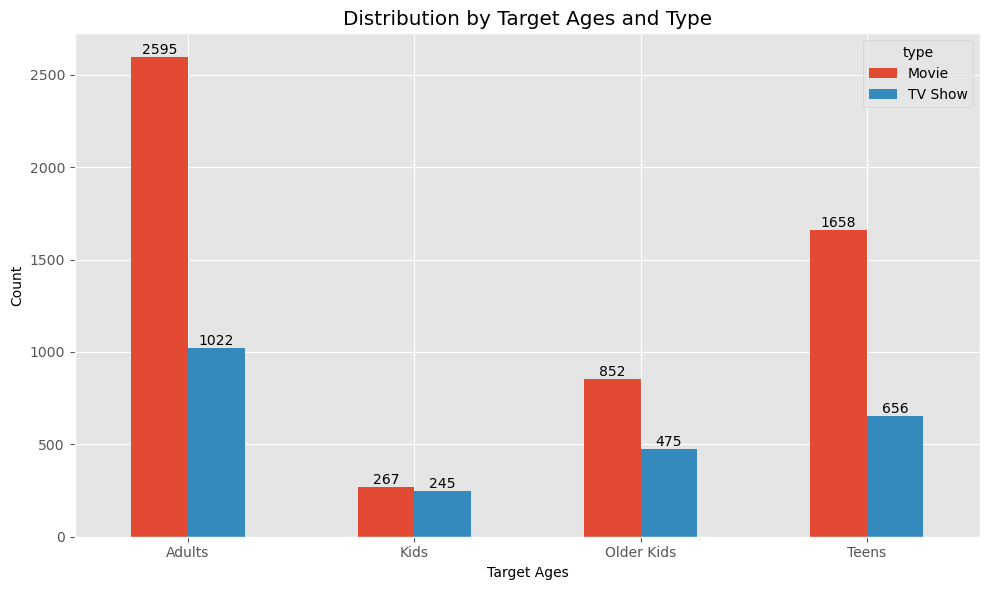

In [100]:
# number of movies and TV shows according to target ages 

# Group data and count occurrences
grouped = df1.groupby(['target_ages', 'type']).size().unstack()

# Create the bar plot
ax = grouped.plot(kind='bar', figsize=(10, 6))

# Add data labels
for container in ax.containers:
    ax.bar_label(container)

# Customize the plot
plt.title('Distribution by Target Ages and Type')
plt.xlabel('Target Ages')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

1. Why did you pick the specific chart?
Bar charts are used to compare the size or frequency of different categories or groups of data.

2. What is/are the insight(s) found from the chart?
Each TV show and movie on Netflix is assigned a maturity rating to help members make informed choices for themselves and their children. So there is much more adult content on netflix as compared to kids and older kids. Netflix also has many movies targeting teen audience. Netflix has more movies as compared to tv shows for every age group.

3. Will the gained insights help creating a positive business impact?
Using the target_ages column we can easily make out the intended audience for a particular movie or TV show and hence Netflix can collect demographic data of various countries and can release content accordingly in various countries.
Netflix should continue adding adult content as well as movies targeting to teenagers which will add more subscriptions.
Little kids need parental guidance so there is less content focusing on them

In [70]:
# Month wise addition of contents


# Create DataFrame To Store Month Values and Counts
months_df = df1.month.value_counts().to_frame().reset_index().rename(columns={'index':'month', 'month':'count'})
months_df

,month,count
0,December,833
1,October,785
2,January,757
3,November,738
4,March,669
5,September,619
6,August,618
7,April,601
8,July,600
9,May,543


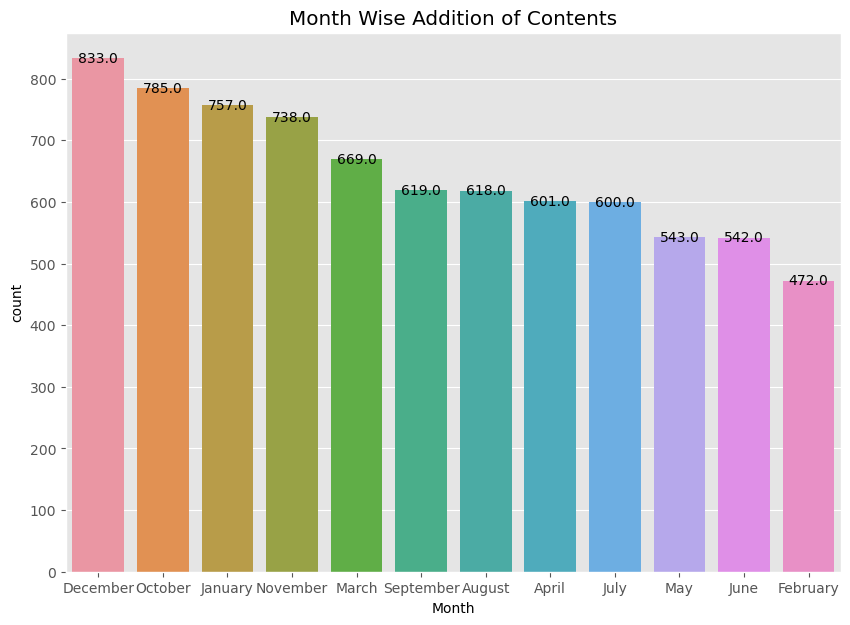

In [73]:
# Bar Plot for Month Wise Addition of Contents on Netflix
plt.figure(figsize=(10, 7))
ax=sns.barplot(data=months_df, x='month', y='count')

# Set Labels
plt.title('Month Wise Addition of Contents')
plt.xlabel('Month')
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center')

# Display Chart
plt.show()

1. Why did you pick the specific chart?
Bar charts are used to compare the size or frequency of different categories or groups of data.

2. What is/are the insight(s) found from the chart?
From above graph, it is observed that most of the shows are uploaded either by year ending or beginning. December being the month with highest release of movies and tv shows(833) followed by October(785) and January(757)

3. Will the gained insights help creating a positive business impact?
December is the month of holidays and also winter season, so people prefer to stay at home and watch movies and series. 

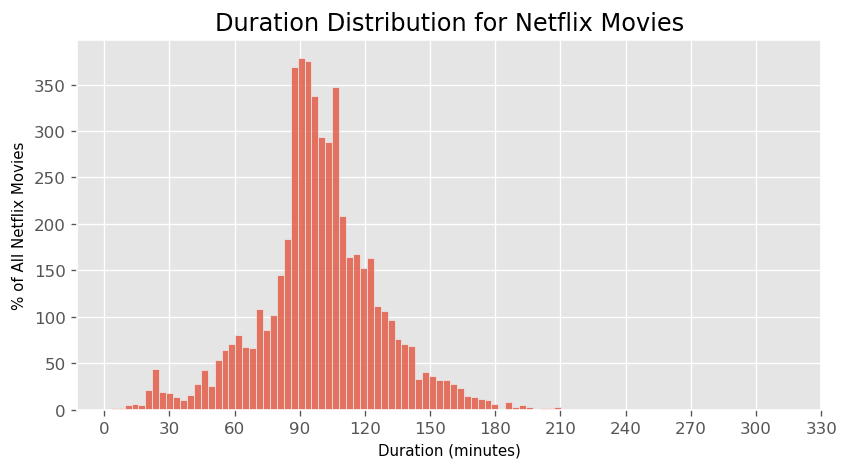

In [74]:
# Duration of netflix movies

# Splitting Movie and mins
df_movies = df1[df1['type']=='Movie'].copy()
df_movies.duration = df_movies.duration.str.replace(' min','').astype(int)

# Histogram for distribution of minutes
plt.figure(figsize=(8,4), dpi=120)
sns.histplot(df_movies.duration)
plt.xticks(np.arange(0,360,30))

# Set Labels
plt.title("Duration Distribution for Netflix Movies")
plt.ylabel("% of All Netflix Movies", fontsize=9)
plt.xlabel("Duration (minutes)", fontsize=9)

# Display Chart
plt.show()

1. Why did you pick the specific chart? 
A histogram is a statistical graph that uses vertical bars to represent the frequency distribution of a dataset. The height of each bar represents the frequency or count of data points within that specific bin. Histograms help visualize the shape of the data distribution, whether it's symmetrical, skewed, or has multiple peaks.

2. What is/are the insight(s) found from the chart?
The duration of maximum movies on netflix is around 90 to 120 mins.

3. Will the gained insights help creating a positive business impact?
So, netflix has to try to keep only those movies on its platform which are around 90 to 120 mins to keep its viewership growing


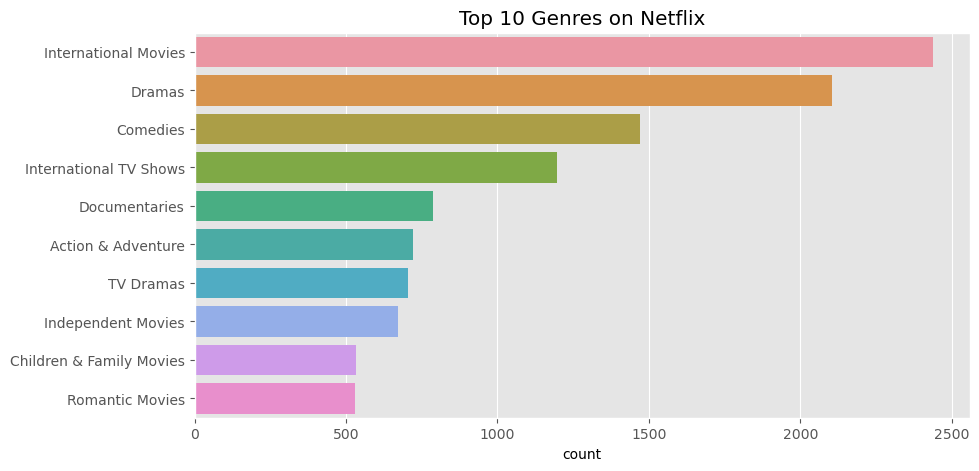

In [75]:
# Top genres on netflix

# Separating genres in listed_in column
genres = df1.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

# Set Labels and Ploting Graph for Top 10 Genres
plt.figure(figsize=(10,5))
g = sns.countplot(y = genres, order=genres.value_counts().index[:10])
plt.title('Top 10 Genres on Netflix')

# Display Chart
plt.show()

1. Why did you pick the specific chart?
Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories.

2. What is/are the insight(s) found from the chart?
Leading the chart is International movies followed by dramas and comedies.

3. Will the gained insights help creating a positive business impact?
Even though U.S. leads in the content available on netflix, but international movies are in highest number. Netflix should add more niumber of international movies, dramas and comedies to increase its membership


# Hypothesis Testing


Hypothesis: The number of movies available on Netflix is greater than the number of TV shows available on Netflix.

Null hypothesis: the mean number of movies is equal to mean number of tv shows
Alternate hypothesis: the mean number of movies is not equal to mean number of tv shows

We can perform two sample z test to accept or reject the null hpothesis


In [78]:
# Importing libraries to perform z test

import numpy as np
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest

## Count the number of movies and TV shows in the DataFrame
n_movies = df1[df1['type'] == 'Movie'].count()['type']
n_tv_shows = df1[df1['type'] == 'TV Show'].count()['type']

counts = [n_movies, n_tv_shows]  # Number of movies and TV shows
obs = [len(df1), len(df1)]  # Total number of observations in the DataFrame

# Perform a two sample z-test and determine p value
z_stat, p_val = ztest(counts, obs, value=0, alternative='two-sided')

# Print results
print("Z-statistic:", z_stat)
print("P-value:", p_val)

# Interpret the results
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means of the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means of the two groups.")


Z-statistic: -2.6123614376889486
P-value: 0.00899191341229054
Reject the null hypothesis: There is a significant difference between the means of the two groups.


This implies that there is a significant difference in the number of movies and tv shows on netflix


 # Solution to Business Objective
 
The analysis revealed that Netflix has a greater number of movies than TV shows confirmed by two sample z test, with a rapidly growing collection of shows from the United States, so Netflix sholud keep on increasing it's movies which are of 90-120 mins duration.

Netflix should keep its content more in USA, movies more in India and TV shows more in South Korea as these categories are popular

International movies should be regularly added on the paltform followed by drama and comedy as they are the top 3 genres that most people like to watch

Maximum content should be added in the months of December, October and January which are the months of maximum holidays as well as winter season when people prefer to stay at home and watch movies.

Adult content with TV-MA rating is very popular especially the movies followed by movies intended for teenage audience. TV shows can be increased for little kids


# Conclusion

Exploring the dataset which consisted of 7787 records and 12 attributes, with a focus on missing value imputation and exploratory data analysis (EDA) to make the data analysis ready. Maximum movies were released in the year 2017 and 2018 while maximum TV shows were released in the year 2020 and 2019. The movies available on netflix are of 90 to 120 minutes duration.
Since data is cleaned and is ready for applying machine learning models which can predict what kind of movies and tv shows will be watched by the audience and help grow the business of Netflix.

